In [1]:
import os.path as osp
import torch
import torch.nn as nn
import numpy as np


#import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline

#from pylab import rcParams
#rcParams['figure.figsize'] = 10, 8
#rcParams['figure.dpi'] = 300

#import torch
#from torch import nn
from torch import distributions
from torch.nn.parameter import Parameter
from torch.autograd import Variable

from mog import getRealNVP

nvp = getRealNVP()
nvp.load_state_dict(torch.load(open('realnvp_1000.pth','r')))

In [2]:
grid0, grid1 = np.meshgrid(np.linspace(-1.5,1.5,100),np.linspace(1.5,-1.5,100))
print grid0.shape, grid1.shape
pts = np.zeros((10000,2))
for i in range(100):
    for j in range(100):
        pts[i*100+j,:] = grid0[i,j],grid1[i,j]
print pts.shape, pts[:10,:]

(100, 100) (100, 100)
(10000, 2) [[-1.5         1.5       ]
 [-1.46969697  1.5       ]
 [-1.43939394  1.5       ]
 [-1.40909091  1.5       ]
 [-1.37878788  1.5       ]
 [-1.34848485  1.5       ]
 [-1.31818182  1.5       ]
 [-1.28787879  1.5       ]
 [-1.25757576  1.5       ]
 [-1.22727273  1.5       ]]


In [5]:
ptsTorch = Variable(torch.from_numpy(pts.astype(np.float32)))
#print ptsTorch

In [21]:
vals, logp = nvp.f(ptsTorch)
print vals, logp

Variable containing:
  2.1359  66.6855
  2.2427  66.0479
  2.3440  65.3773
  2.4423  64.6871
  2.5370  63.9753
  2.6252  63.2248
  2.7078  62.4375
  2.7833  61.6033
  2.8529  60.7368
  2.9222  59.8708
[torch.FloatTensor of size 10x2]
 Variable containing:
 5.9132
 5.9077
 5.9018
 5.8955
 5.8889
 5.8818
 5.8743
 5.8662
 5.8575
 5.8484
[torch.FloatTensor of size 10]



In [39]:
#from mog import priorLogProb
#print priorLogProb(vals)
#print vals.size(1)
#c = Variable(torch.Tensor(-vals.size(1)*np.log(np.sqrt(2*np.pi))))
c = float(-vals.size(1)*np.log(np.sqrt(2*np.pi)))
print type(c)
print c-0.5*(vals**2).sum(dim=1)

<type 'float'>
Variable containing:
-2227.5969
-2185.5164
-2141.6785
-2097.0300
-2051.4736
-2003.9717
-1954.7229
-1903.1931
-1850.3854
-1798.3638
[torch.FloatTensor of size 10]



In [6]:
#print "hello"
probs = nvp.log_prob(ptsTorch)
print type(probs), probs.shape, probs
#probs = probs.numpy().reshape((100,100))

<class 'torch.autograd.variable.Variable'> torch.Size([10000]) Variable containing:
-2.2217e+03
-2.1796e+03
-2.1358e+03
     ⋮     
-8.8436e+02
-9.0204e+02
-9.1954e+02
[torch.FloatTensor of size 10000]



In [7]:
probsNumpy = probs.data.numpy().reshape((100,100))
print probsNumpy[:5,:5]

[[-2221.6838 -2179.6086 -2135.7766 -2091.1345 -2045.5847]
 [-2113.1714 -2072.7397 -2030.6223 -1987.6753 -1943.8557]
 [-2006.6631 -1967.8772 -1927.416  -1886.2051 -1844.222 ]
 [-1902.0822 -1864.8911 -1826.1514 -1786.6985 -1746.3887]
 [-1799.6849 -1764.166  -1727.0999 -1689.2155 -1650.5538]]


In [8]:
import matplotlib.pyplot as plt

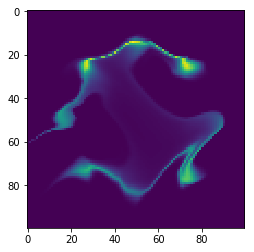

In [11]:
#transformed = probsNumpy+np.abs(probsNumpy.min())
#transformed = transformed / transformed.max()
transformed = np.exp(probsNumpy)
plt.imshow(transformed)